In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv("spam.csv" , encoding="latin")

In [3]:
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2168,ham,Thx. All will be well in a few months,NaN,NaN,NaN
4934,ham,"Hey babe, how's it going ? Did you ever figure...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# 1 Data Cleaning
# 2 EDA
# 3 Text Preprocessing
# 4 Model Building
# 5 Evaluation
# 6 Improvements
# 7 Website
# 8 Deploy

In [7]:
df.drop(columns = ['Unnamed: 2' , "Unnamed: 3" , "Unnamed: 4"] , inplace = True)

In [8]:
df.rename(columns = {"v1":"Target" , 'v2': "Text"} , inplace = True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Target'] = le.fit_transform(df['Target'])

In [12]:
df.head(2)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep = "first")

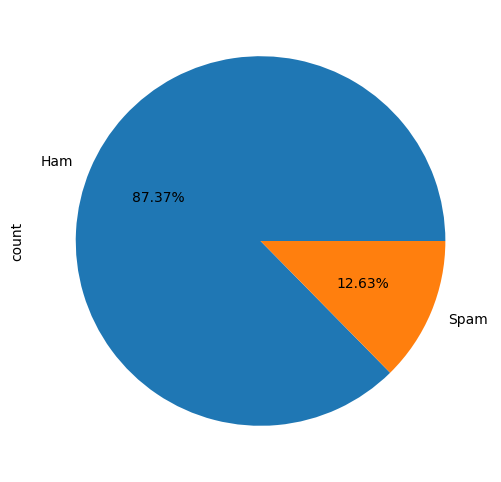

In [15]:
df['Target'].value_counts().plot(kind = 'pie' , labels = ['Ham' , 'Spam'] ,
                                 autopct = "%0.2f%%" , figsize = (6,6))
plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['Text'].apply(len)

In [18]:
df.head(2)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [19]:
df['Word_count'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['Sent_count'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head(2)

,Target,Text,num_characters,Word_count,Sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [22]:
df.describe()

,Target,num_characters,Word_count,Sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
# For not spam
df[df['Target']==0].describe()

,Target,num_characters,Word_count,Sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
# For spam
df[df['Target']==1].describe()

,Target,num_characters,Word_count,Sent_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

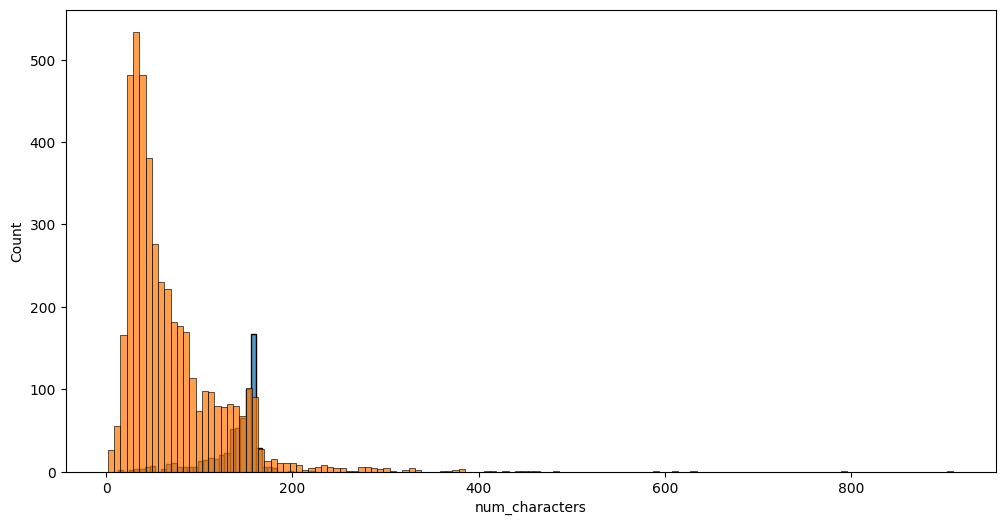

In [25]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target']==1]['num_characters'])
sns.histplot(df[df['Target']==0]['num_characters'])

<Axes: xlabel='Word_count', ylabel='Count'>

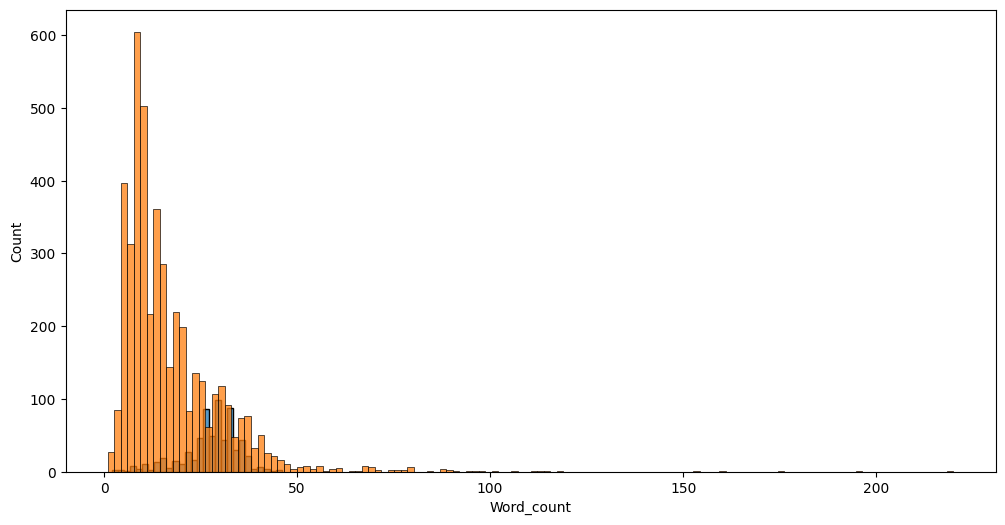

In [26]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target']==1]['Word_count'])
sns.histplot(df[df['Target']==0]['Word_count'])

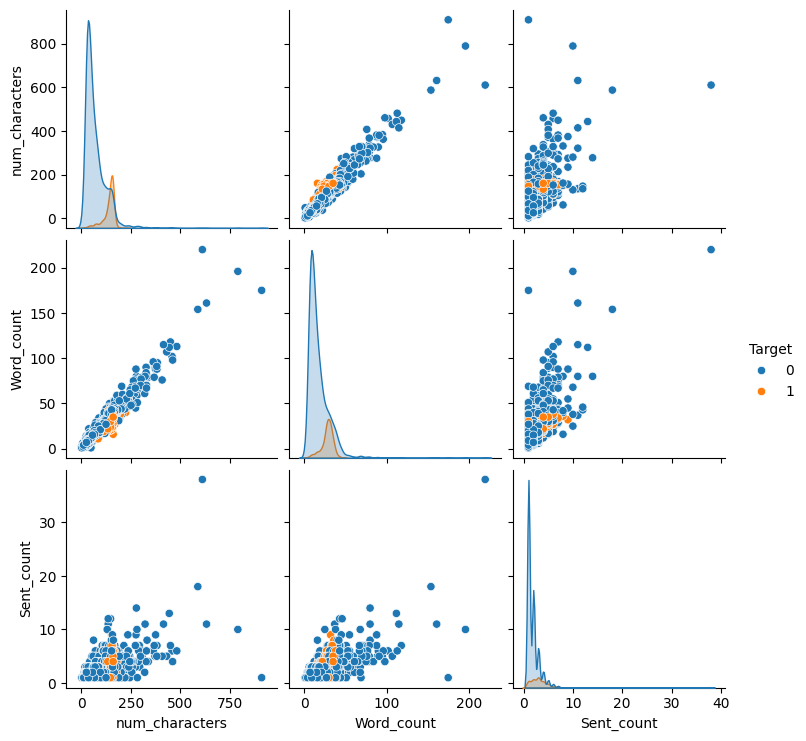

In [27]:
sns.pairplot(df,hue='Target')

<Axes: >

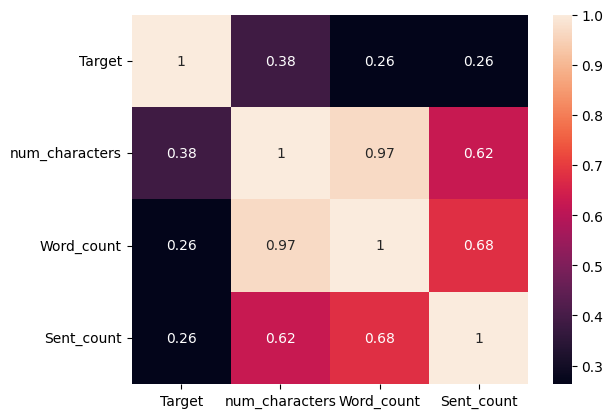

In [28]:
sns.heatmap(df[['Target', 'num_characters', 'Word_count', 'Sent_count']].corr() , annot=True)

In [29]:
df.columns

Index(['Target', 'Text', 'num_characters', 'Word_count', 'Sent_count'], dtype='object')

In [30]:
# Data Preprocessing
#     Lowercase
#     tokenization
#     Removing special characters
#     Removing stopwords and pancuations
#     Stemming

In [31]:
ps = PorterStemmer()
def text_transformer(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
text_transformer("HELLO %% 20 is am are / [] amazing great")

'hello 20 amaz great'

In [33]:
df['Transformed_text'] = df['Text'].apply(text_transformer)

In [34]:
df.sample(5)

,Target,Text,num_characters,Word_count,Sent_count,Transformed_text
4504,1,Mobile Club: Choose any of the top quality ite...,73,15,2,mobil club choos top qualiti item mobil 7cfca1a
2746,0,K da:)how many page you want?,29,10,1,k da mani page want
761,0,"We are at grandmas. Oh dear, u still ill? I fe...",135,34,5,grandma oh dear u still ill felt shit morn thi...
742,0,Just got up. have to be out of the room very s...,181,46,5,got room soon put clock back til 8 shout every...
2194,0,Hi my email address has changed now it is,42,9,1,hi email address chang


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=550,height=550,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep = " "))
ham_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep = " "))

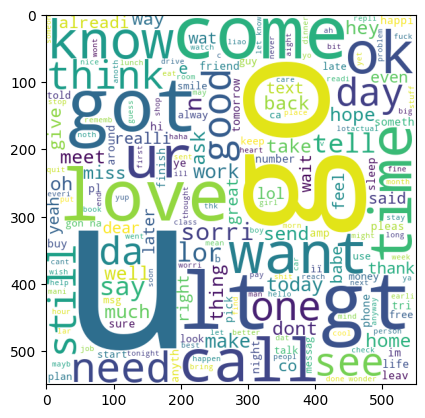

In [37]:
plt.imshow(spam_wc)

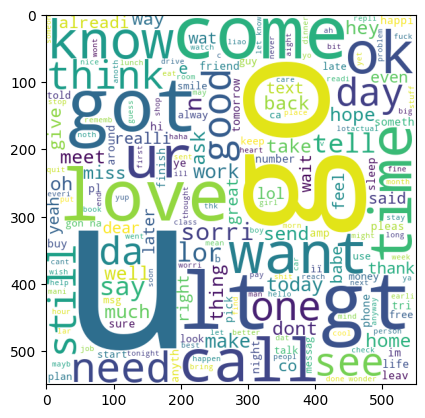

In [38]:
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
ham_corpus = []

for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
from collections import Counter

In [41]:
print("Spam top 30 most frequent words-->>\n")
print(Counter(spam_corpus).most_common(30))

print('\nHam top 30 most frequent words -->>\n')
print(Counter(ham_corpus).most_common(30))

Spam top 30 most frequent words-->>

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]

Ham top 30 most frequent words -->>

[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 142), ('tell', 133), ('make', 129)]


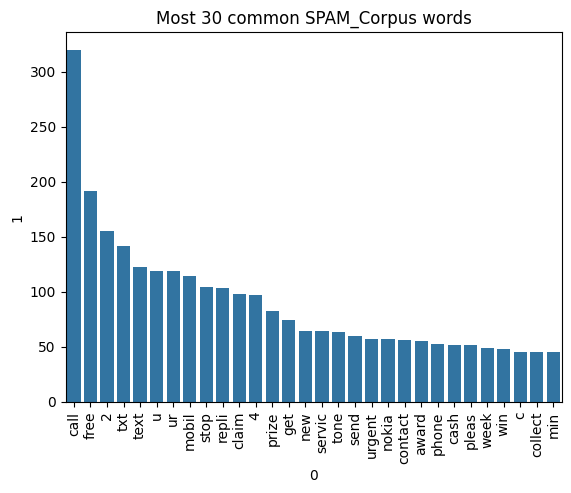

In [42]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.title("Most 30 common SPAM_Corpus words")
plt.show()

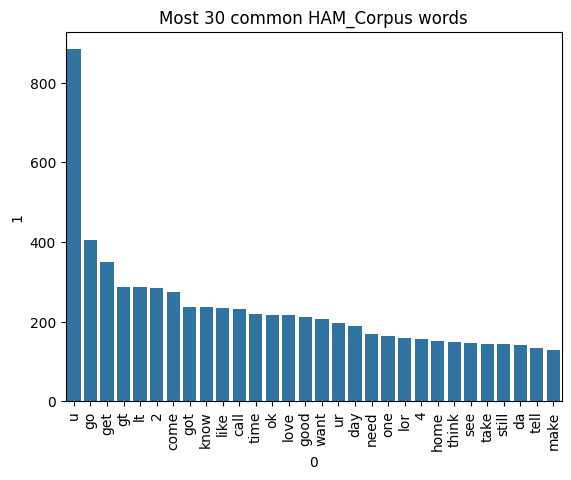

In [43]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.title("Most 30 common HAM_Corpus words")
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [45]:
X = cv.fit_transform(df['Transformed_text']).toarray()
x = tf.fit_transform(df['Transformed_text']).toarray()

In [46]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
Y = df['Target'].values

In [48]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_text,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

BernoulliNB()

In [53]:
y_predg = gnb.predict(x_text)
y_predm = mnb.predict(x_text)
y_predb = bnb.predict(x_text)

In [54]:
print(accuracy_score(y_test,y_predg), "\n")
print(precision_score(y_test,y_predg), "\n")
print(confusion_matrix(y_test,y_predg), "\n")

0.8694390715667312 

0.5068493150684932 

[[788 108]
 [ 27 111]] 



In [55]:
print(accuracy_score(y_test,y_predm), "\n")
print(precision_score(y_test,y_predm), "\n")
print(confusion_matrix(y_test,y_predm), "\n")

0.9709864603481625 

1.0 

[[896   0]
 [ 30 108]] 



In [56]:
print(accuracy_score(y_test,y_predb), "\n")
print(precision_score(y_test,y_predb), "\n")
print(confusion_matrix(y_test,y_predb), "\n")

0.9835589941972921 

0.991869918699187 

[[895   1]
 [ 16 122]] 



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [59]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc,  
    'ETC': etc,
}

In [60]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [61]:
train_classifier(svc,x_train,x_text,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,x_text,y_train,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [63]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [66]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [67]:
y_pred = voting.predict(x_text)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [68]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [69]:
from sklearn.ensemble import StackingClassifier

In [70]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [71]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))